In [5]:
import numpy as np
from sklearn.decomposition import PCA
from google.colab import drive
import os
import torch

In [2]:
drive.mount('/drive')

Mounted at /drive


In [3]:
def pca_fun(array):
    pca = PCA(n_components=1)
    pca.fit(array)
    return(pca)

In [14]:
path = '/drive/My Drive/BIA_MnistTrained/models_layers/model rdms'
layers = ['conv1', 'conv1', 'fc1', 'fc2']
model_rdms_reduced = []
for i in range(20):
    # for l in layers:
    model_path = os.path.join(path, 'model_{0}_{1}rdm.pth'.format(i, 'fc2'))
    rdm = torch.load(model_path)
    pca = pca_fun(rdm)
    transformed = pca.transform(rdm)
    model_rdms_reduced.append(transformed.mean(axis=0)[0])

In [15]:
model_rdms_reduced

[-2.7755575615628914e-17,
 0.0,
 -1.554312234475219e-16,
 -9.992007221626409e-17,
 -6.661338147750939e-17,
 -1.1102230246251565e-16,
 2.220446049250313e-16,
 -7.216449660063518e-17,
 0.0,
 6.106226635438361e-17,
 5.551115123125783e-17,
 1.9984014443252818e-16,
 6.38378239159465e-17,
 -6.106226635438361e-17,
 -7.216449660063518e-17,
 -8.881784197001253e-17,
 -9.853229343548264e-17,
 -1.1102230246251565e-16,
 1.7763568394002506e-16,
 6.661338147750939e-17]

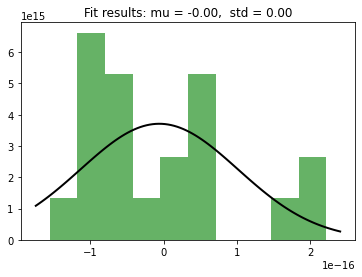

In [16]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mu, std = norm.fit(model_rdms_reduced)

plt.hist(model_rdms_reduced, bins=10, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [23]:
path = '/drive/My Drive/BIA_MnistTrained/fMRI_RDMs'
fmri_rdms_reduced = []
for i in range(10):
    data_path = os.path.join(path, 'participant_{0}_rdm.pth'.format(i))
    rdm = torch.load(data_path)
    pca = pca_fun(rdm)
    transformed = pca.transform(rdm)
    fmri_rdms_reduced.append(transformed.mean(axis=0)[0])

In [28]:
fmri_rdms_reduced

[1.3322676295501878e-16,
 8.881784197001253e-17,
 9.992007221626409e-17,
 7.771561172376095e-17,
 8.881784197001253e-17,
 1.3322676295501878e-16,
 0.0,
 1.2212453270876723e-16,
 1.3322676295501878e-16,
 1.3322676295501878e-16]

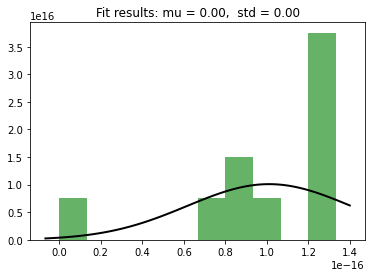

In [30]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mu, std = norm.fit(fmri_rdms_reduced)

plt.hist(fmri_rdms_reduced, bins=10, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [26]:
std

3.954950396191509e-17